Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64


<AxesSubplot:xlabel='Date'>

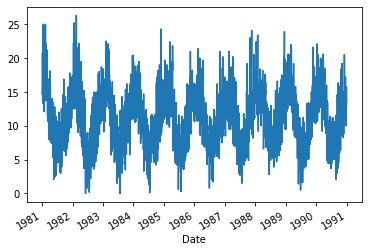

In [1]:
# lee daily-minimum-temperatures.csv
from pandas import read_csv
from matplotlib import pyplot

series = read_csv('Ficheros/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True )
# squeeze: bool, default False. If the parsed data only contains one column then return a Series

print(series.head())
series.plot()

<AxesSubplot:xlabel='Date'>

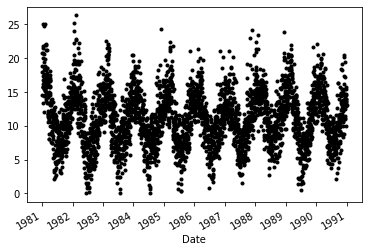

In [2]:

# haz un plot
series.plot(style='k.')

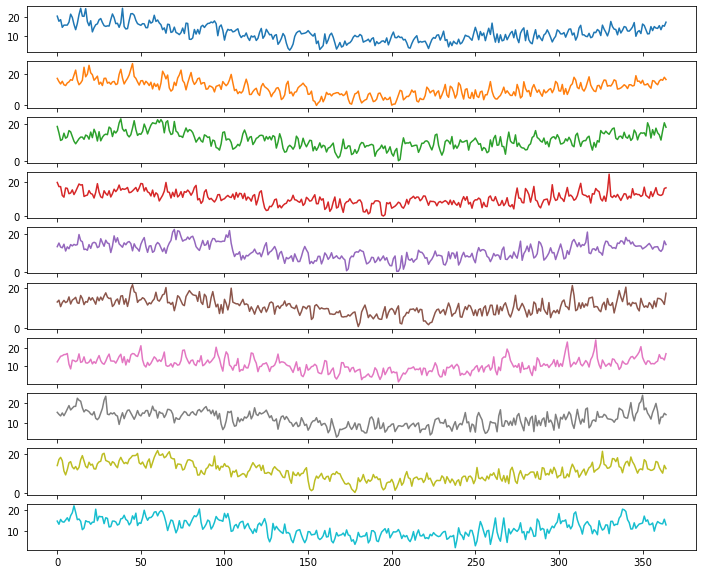

In [3]:
# agrúpalo por años y muestra gráficas para cada año
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot

groups = series.groupby(Grouper(freq='A')) # A es year
years = DataFrame()
for name, group in groups:
    #print('name:', name, 'group:', group)
    years[name.year] = group.values
years.plot(subplots=True, legend=False, figsize=(12,10));

In [4]:
# muestra los años en una tabla
years

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,20.7,17.0,18.4,19.5,13.3,12.9,12.3,15.3,14.3,14.8
1,17.9,15.0,15.0,17.1,15.2,13.8,13.8,14.3,17.4,13.3
2,18.8,13.5,10.9,17.1,13.1,10.6,15.3,13.5,18.5,15.6
3,14.6,15.2,11.4,12.0,12.7,12.6,15.6,15.0,16.8,14.5
4,15.8,13.0,14.8,11.0,14.6,13.7,16.2,13.6,11.5,14.3
...,...,...,...,...,...,...,...,...,...,...
360,15.5,15.3,13.9,12.2,11.5,14.6,16.2,9.5,13.3,14.0
361,13.3,16.3,11.1,12.0,10.8,14.2,14.2,12.9,11.7,13.6
362,15.6,15.8,16.1,12.6,12.0,13.2,14.3,12.9,10.4,13.5
363,15.2,17.7,20.4,16.0,16.3,11.7,13.3,14.8,14.4,15.7


# 2. Time Series Histogram and Density Plots

Another important visualization is of the distribution of observations themselves.

This means a plot of the values without the temporal ordering.

Some linear time series forecasting methods assume a well-behaved distribution of observations (i.e. a bell curve or normal distribution). This can be explicitly checked using tools like statistical hypothesis tests. But plots can provide a useful first check of the distribution of observations both on raw observations and after any type of data transform has been performed.

The example below creates a histogram plot of the observations in the Minimum Daily Temperatures dataset. A histogram groups values into bins, and the frequency or count of observations in each bin can provide insight into the underlying distribution of the observations.

<AxesSubplot:>

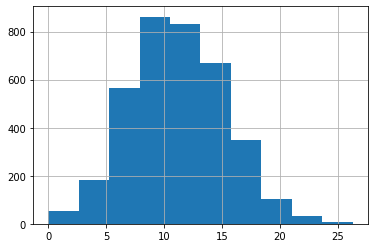

In [5]:
# muestra el histograma
series.hist()

We can get a better idea of the shape of the distribution of observations by using a density plot.

This is like the histogram, except a function is used to fit the distribution of observations and a nice, smooth line is used to summarize this distribution.

Below is an example of a density plot of the Minimum Daily Temperatures dataset.

<AxesSubplot:ylabel='Density'>

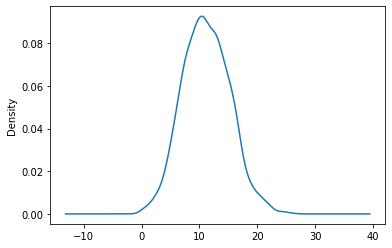

In [6]:
# muestra la densidad de probabilidad
series.plot(kind='kde')

Running the example creates a plot that provides a clearer summary of the distribution of observations. We can see that perhaps the distribution is a little asymmetrical and perhaps a little pointy to be Gaussian.

# 3. Time Series Box and Whisker Plots by Interval

Histograms and density plots provide insight into the distribution of all observations, but we may be interested in the distribution of values by time interval.

Another type of plot that is useful to summarize the distribution of observations is the box and whisker plot. This plot draws a box around the 25th and 75th percentiles of the data that captures the middle 50% of observations. A line is drawn at the 50th percentile (the median) and whiskers are drawn above and below the box to summarize the general extents of the observations. Dots are drawn for outliers outside the whiskers or extents of the data.

Box and whisker plots can be created and compared for each interval in a time series, such as years, months, or days.

Below is an example of grouping the Minimum Daily Temperatures dataset by years, as was done above in the plot example. A box and whisker plot is then created for each year and lined up side-by-side for direct comparison.

<AxesSubplot:>

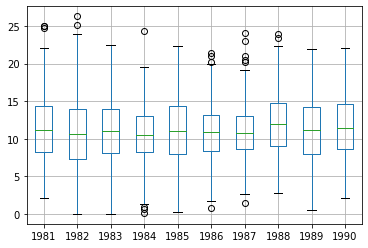

In [7]:

from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
import numpy as np

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

series = read_csv('Ficheros/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

groups = series.groupby(Grouper(freq='A'))

years = DataFrame()
for name, group in groups:
    years[name.year] = group.values

years.boxplot()




We may also be interested in the distribution of values across months within a year.

The example below creates 12 box and whisker plots, one for each month of 1990, the last year in the dataset.

In the example, first, only observations from 1990 are extracted.

Then, the observations are grouped by month, and each month is added to a new DataFrame as a column.

Finally, a box and whisker plot is created for each month-column in the newly constructed DataFrame.

In [8]:
# create a boxplot of yearly data

months:        0     0     0     0     0     0     0     0     0     0     0     0
0   14.8  12.0  19.3  15.3  13.0   9.7   7.4   6.8   6.0  11.3  15.4  13.3
1   13.3  12.2  17.3  14.7  13.9   8.2   7.3   9.8   9.5  10.5  11.8  13.2
2   15.6  14.8  19.0  11.0  12.6   8.4   7.7   5.7   8.6   9.9  13.0  16.2
3   14.5  14.8  19.8  12.2  14.3   8.5   7.7   8.6   7.6  11.0  11.1  17.3
4   14.3  14.4  19.3  14.2  16.0  10.4   9.3  10.6  10.4  14.0  12.5  20.5
5   15.3  12.9  17.2  17.0  13.3   6.8   4.4   7.8  10.3   9.2  18.3  20.2
6   16.4  13.4  14.2  15.8   7.0   6.0   5.7   7.7   7.5   9.8  19.2  19.4
7   14.8  15.9  10.3  15.2   4.9   6.6  10.2   8.6   3.0   6.0  15.4  15.5
8   17.4  16.1  13.0  15.1   6.9   7.8  10.2   6.5   5.3   9.8  13.1  14.1
9   18.8  17.6  15.3  14.7  13.7  10.3   9.3   6.9  10.5   9.2  11.5  11.0
10  22.1  15.6  15.0  18.5  10.6   7.2   5.4   6.4  14.6  11.8   8.6  11.1
11  19.0  15.0  12.1  16.4  12.3   7.4   5.0   8.5  12.6  10.3  12.6  14.0
12  15.5  13.0   

<AxesSubplot:>

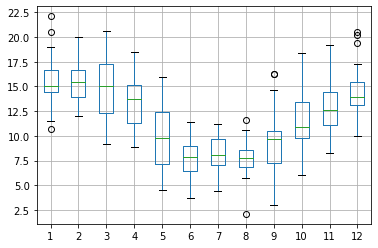

In [9]:
# create a boxplot of monthly data
from pandas import concat

series = read_csv('Ficheros/daily-minimum-temperatures.csv', header=0, index_col = 0, parse_dates = True, squeeze=True)
one_year = series['1990']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
print('months:', months)
print(type(months))
# x[0] es el timestamp, x[1] son los valores
#months = DataFrame(months)
months.columns = range(1,13)
months.boxplot()

# 4. Time Series Heat Maps

A matrix of numbers can be plotted as a surface, where the values in each cell of the matrix are assigned a unique color.

This is called a heatmap, as larger values can be drawn with warmer colors (yellows and reds) and smaller values can be drawn with cooler colors (blues and greens).

Like the box and whisker plots, we can compare observations between intervals using a heat map.

In the case of the Minimum Daily Temperatures, the observations can be arranged into a matrix of year-columns and day-rows, with minimum temperature in the cell for each day. A heat map of this matrix can then be plotted.

Below is an example of creating a heatmap of the Minimum Daily Temperatures data. The matshow() function from the matplotlib library is used as no heatmap support is provided directly in Pandas.

For convenience, the matrix is rotation (transposed) so that each row represents one year and each column one day. This provides a more intuitive, left-to-right layout of the data.

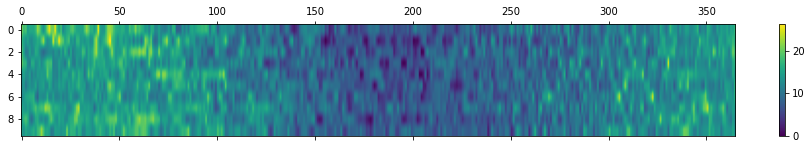

In [10]:
# muestra un mapa de calor con
# por columnas los días
# por filas los años

series = read_csv('Ficheros/daily-minimum-temperatures.csv', header=0, index_col = 0, parse_dates = True, squeeze=True)
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years = years.T
pyplot.matshow(years, interpolation=None, aspect='auto')
pyplot.colorbar()


Below is an example of a heat map comparing the months of the year in 1990. Each column represents one month, with rows representing the days of the month from 1 to 31.

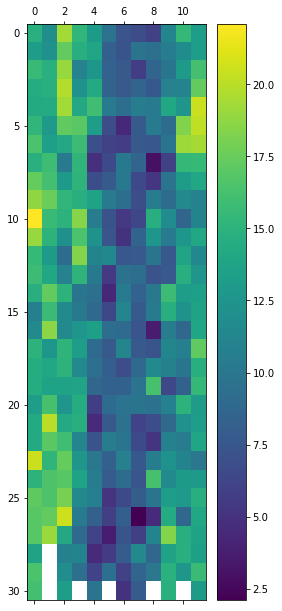

In [11]:
# muestra un mapa de calor con
# columnas son meses
# filas son días del mes

series = read_csv('Ficheros/daily-minimum-temperatures.csv', header=0, index_col = 0, parse_dates = True, squeeze=True)
one_year = series['1990']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)

months.columns = range(1,13)
pyplot.matshow(months, interpolation = None, aspect = 'auto')
pyplot.colorbar()

Running the example shows the same macro trend seen for each year on the zoomed level of month-to-month.

We can also see some white patches at the bottom of the plot. This is missing data for those months that have fewer than 31 days, with February being quite an outlier with 28 days in 1990.

# 5. Time Series Lag Scatter Plots

Time series modeling assumes a relationship between an observation and the previous observation.

Previous observations in a time series are called lags, with the observation at the previous time step called lag1, the observation at two time steps ago lag2, and so on.

A useful type of plot to explore the relationship between each observation and a lag of that observation is called the scatter plot.

Pandas has a built-in function for exactly this called the lag plot. It plots the observation at time t on the x-axis and the lag1 observation (t-1) on the y-axis.

    If the points cluster along a diagonal line from the bottom-left to the top-right of the plot, it suggests a positive correlation relationship.
    If the points cluster along a diagonal line from the top-left to the bottom-right, it suggests a negative correlation relationship.
    Either relationship is good as they can be modeled.

More points tighter in to the diagonal line suggests a stronger relationship and more spread from the line suggests a weaker relationship.

A ball in the middle or a spread across the plot suggests a weak or no relationship.

Below is an example of a lag plot for the Minimum Daily Temperatures dataset.

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

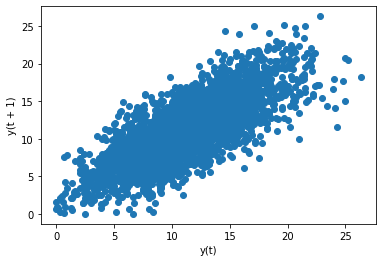

In [12]:
# haz un scatterplot de y(t) vs y(t+1)
from pandas.plotting import lag_plot

series = read_csv('Ficheros/daily-minimum-temperatures.csv', header=0, index_col = 0, parse_dates = True, squeeze=True)

lag_plot(series)


We can repeat this process for an observation and any lag values. Perhaps with the observation at the same time last week, last month, or last year, or any other domain-specific knowledge we may wish to explore.

For example, we can create a scatter plot for the observation with each value in the previous seven days. Below is an example of this for the Minimum Daily Temperatures dataset.

First, a new DataFrame is created with the lag values as new columns. The columns are named appropriately. Then a new subplot is created that plots each observation with a different lag value.

         0     0     0     0     0     0     0     0
0     20.7   NaN   NaN   NaN   NaN   NaN   NaN   NaN
1     17.9  20.7   NaN   NaN   NaN   NaN   NaN   NaN
2     18.8  17.9  20.7   NaN   NaN   NaN   NaN   NaN
3     14.6  18.8  17.9  20.7   NaN   NaN   NaN   NaN
4     15.8  14.6  18.8  17.9  20.7   NaN   NaN   NaN
...    ...   ...   ...   ...   ...   ...   ...   ...
3645  14.0  14.6  12.9  10.0  13.9  13.2  13.1  15.4
3646  13.6  14.0  14.6  12.9  10.0  13.9  13.2  13.1
3647  13.5  13.6  14.0  14.6  12.9  10.0  13.9  13.2
3648  15.7  13.5  13.6  14.0  14.6  12.9  10.0  13.9
3649  13.0  15.7  13.5  13.6  14.0  14.6  12.9  10.0

[3650 rows x 8 columns]


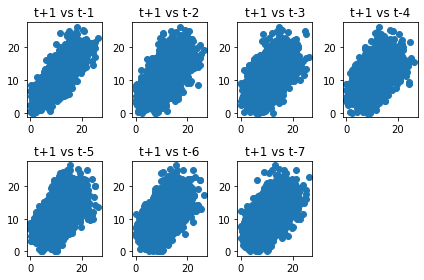

In [13]:
# vamos a ver la importancia del print para depurar
# este apartado lo resolvemos en clase todos juntos

from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from pandas.plotting import scatter_matrix

series = read_csv('Ficheros/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

values = DataFrame(series.values) # quito los índices
lags = 7
columns = [values] # es una lista, busco que la primera columna sean los valores, el resto de columnas serán el lag1, lag2, lag3...

for i in range(1,(lags + 1)): # recorro todos los valores del lag
    columns.append(values.shift(i)) # columns[0] son los valores originales, columns[1] son esos valores desplazados 1 (lag1, el previo)...
#print(columns[0:3]) # veo el efecto del shift

dataframe = concat(columns, axis=1) # axis 1 son columnas
print(dataframe) # veo el DataFrame con el efecto del shift

columns = ['t+1'] # los valores actuales, voy a generar los nombres de las columnas
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i)) # genero todos los nombres de las columnas
dataframe.columns = columns # asocio los nombres de las columnas
pyplot.figure(1)
for i in range(1,(lags + 1)):
    ax = pyplot.subplot(240 + i) # 2 filas, 4 columnas y el que quiero seleccionar
    ax.set_title('t+1 vs t-' + str(i))
    pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
    pyplot.tight_layout() # muy importante para verlo bien




# 6. Time Series Autocorrelation Plots

We can quantify the strength and type of relationship between observations and their lags.

In statistics, this is called correlation, and when calculated against lag values in time series, it is called autocorrelation (self-correlation).

A correlation value calculated between two groups of numbers, such as observations and their lag1 values, results in a number between -1 and 1. The sign of this number indicates a negative or positive correlation respectively. A value close to zero suggests a weak correlation, whereas a value closer to -1 or 1 indicates a strong correlation.

Correlation values, called correlation coefficients, can be calculated for each observation and different lag values. Once calculated, a plot can be created to help better understand how this relationship changes over the lag.

This type of plot is called an autocorrelation plot and Pandas provides this capability built in, called the autocorrelation_plot() function.

The example below creates an autocorrelation plot for the Minimum Daily Temperatures 

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

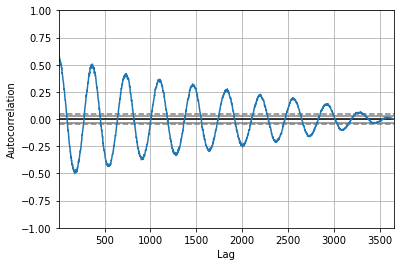

In [14]:
# create an autocorrelation plot
from pandas.plotting import autocorrelation_plot

series = read_csv('Ficheros/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

autocorrelation_plot(series)

The resulting plot shows lag along the x-axis and the correlation on the y-axis. Dotted lines are provided that indicate any correlation values above those lines are statistically significant (meaningful).

We can see that for the Minimum Daily Temperatures dataset we see cycles of strong negative and positive correlation. This captures the relationship of an observation with past observations in the same and opposite seasons or times of year. Sine waves like those seen in this example are a strong sign of seasonality in the dataset.